# Modelo para predição da qualidade de vinhos
## Problema de negócio
O controle de qualidade nos diferentes setores de manufatura pode se beneficiar muito
da aplicação de ferramentas de machine learning. Modelos preditivos podem trazer
ganho de tempo ao prever resultados de análises demoradas ou ainda obter ganhos de
processo, prevendo como parâmetros de controle podem impactar na qualidade do
produto e permitindo fazer correções a tempo de evitar a produção de produtos nãoconformes. Ferramentas de machine learning podem também reduzir a necessidade de
análises de custo elevado por meio de aplicações capazes de predizer resultados a partir
dos resultados de análises mais simples.

## Dataset
Para desenvolver o projeto de machine learning foi escolhido um dataset disponível no kaggle (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) onde são listadas análises físico-químicas de amostras de vinho, especificamente
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulfates, alcohol. Também estão disponíveis os resultados de uma análise sensorial feita por técnicos, onde as amostras de vinho foram classificadas na qualidade geral com notas de 0 a 10.

A proposta é prever os resultados das análises sensoriais a partir das demais análises físico-químicas, uma vez que essas análises físico-químicas são obrigatoriamente feitas para a certificação do vinho. Assim, as análises físico-químicas serão as variáveis de entrada do modelo, enquanto a análise sensorial será a variável de saída.

#### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Importação do dataset

In [2]:
wine = pd.read_csv('winequality.csv')
wine.head(5)  #Para visualizar as variáveis (features)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Exploração dos dados

In [4]:
wine.info()  # esse comando apresena as features e qual o tipo de cada uma

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum() #este comando verifica a presença de dados faltantes no dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Na sequência vamos entender o comportamento das variáves com algumas visualizações

<AxesSubplot:>

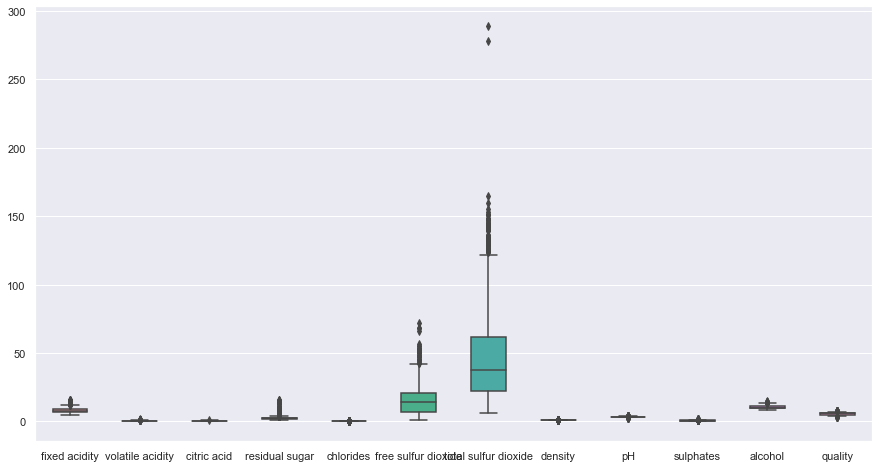

In [6]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=wine,width=0.5)

<AxesSubplot:xlabel='quality', ylabel='Count'>

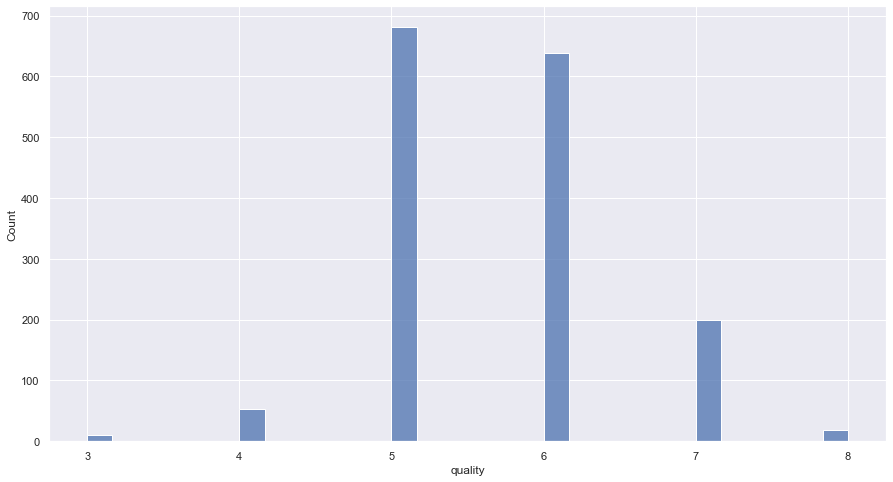

In [7]:
sns.histplot(data=wine['quality'])

### Construção do modelo
Para a construção do modelo as análises físico-químicas serão as variáveis de entrada do modelo, enquanto a análise sensorial será a variável de saída.

#### Seleção das variáveis
O conjunto de variáveis preditoras será denominado x.
E a variável resposta será denominada y.

In [20]:
X = wine.drop('quality', axis=1) #removendo a variável 'quality' para ficarmos apenas com as variáveis preditoras.
X.head(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
y = wine['quality'] #seleção da variável resposta que é a feature 'quality' que é análise sensorial do vinho
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

#### Modelagem 

In [22]:
#dividindo os dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [23]:
#Padronizando os dados
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(X_train)  
Xs_train = scaler.transform(X_train)  
Xs_test = scaler.transform(X_test)  



In [24]:
#treinamento da rede neural
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
rede = MLPClassifier(hidden_layer_sizes=(100,50,10),
                     random_state=1,
                     max_iter=10000,
                     solver='lbfgs').fit(Xs_train, y_train)

In [27]:
y_pred = rede.predict(Xs_test)
y_pred_train = rede.predict(Xs_train)
y_pred_train.shape


(1119,)

In [28]:
#avaliação da acurácia do modelo de regressão
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(r2_score(y_pred, y_test))
RMSEP = np.sqrt((np.sum((y_pred - y_test) ** 2)) / 20);
RMSEP

0.08471716361092274


3.7282703764614498

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_pred, y_test))
print(accuracy_score(y_pred_train, y_train))

[[  0   1   0   0   0   0]
 [  0   5   4   7   0   0]
 [  0  10 156  43   5   0]
 [  0   6  60 103  19   3]
 [  0   0   9  14  29   0]
 [  0   0   0   1   3   2]]
0.6145833333333334
1.0


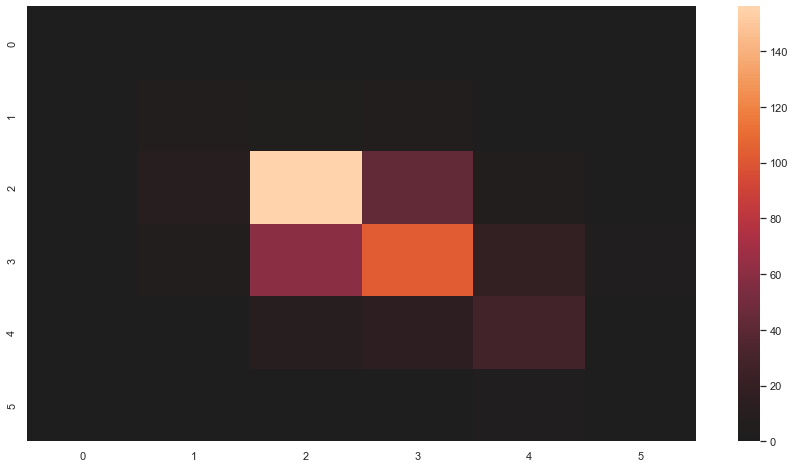

In [32]:
sns.heatmap(cm, center=True)
plt.show()

C:\Users\livia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='quality'>

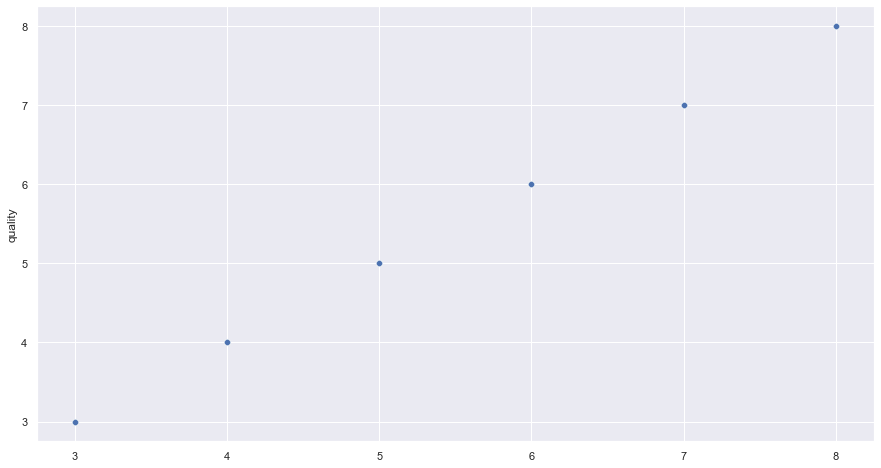

In [33]:
sns.scatterplot(y_pred_train,y_train)

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression().fit(Xs_train, y_train)
print(regr.coef_) 


[ 0.03998368 -0.22415528 -0.03795139 -0.00147375 -0.08090151  0.04783533
 -0.10301751 -0.04212965 -0.0575534   0.15575328  0.28389956]


In [35]:
y_pred = regr.predict(Xs_test)

### Avaliação do modelo

In [41]:
# The mean square error
np.mean((y_pred - y_test)**2)

0.4085406553394728

In [40]:
#print(regr.score(xs_test, y_test))
print(r2_score(y_test, y_pred))

0.32773083605174813


In [46]:
import statsmodels.api as sm
from scipy import stats
xs_train2 = sm.add_constant(xs_train)
est = sm.OLS(y_train, xs_train2)
est2 = est.fit()
print(est2.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     58.20
Date:                Sun, 17 Oct 2021   Prob (F-statistic):          9.60e-102
Time:                        03:55:05   Log-Likelihood:                -1098.2
No. Observations:                1119   AIC:                             2220.
Df Residuals:                    1107   BIC:                             2281.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6452      0.019    290.924      0.0

In [49]:
x.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [52]:
xn = x.drop(['fixed acidity', 'citric acid', 'residual sugar', 'density'], axis=1)
xn.head(5)


,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.70,0.076,11.0,34.0,3.51,0.56,9.4
1,0.88,0.098,25.0,67.0,3.20,0.68,9.8
2,0.76,0.092,15.0,54.0,3.26,0.65,9.8
3,0.28,0.075,17.0,60.0,3.16,0.58,9.8
4,0.70,0.076,11.0,34.0,3.51,0.56,9.4


In [53]:
from sklearn.model_selection import train_test_split
xn_train, xn_test, y_train, y_test = train_test_split(xn, y, test_size=0.30)
print(xn_train.shape)
print(y_train.shape)

(1119, 7)
(1119,)


In [54]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(xn_train)  
xns_train = scaler.transform(xn_train)  
xns_test = scaler.transform(xn_test)  


In [55]:
from sklearn.neural_network import MLPRegressor
rede = MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs').fit(xns_train, y_train)

In [56]:
y_pred = rede.predict(xns_test)
y_pred.shape

(480,)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(r2_score(y_pred, y_test))
RMSEP = np.sqrt((np.sum((y_pred - y_test) ** 2)) / 20);
RMSEP

0.02305740491157504


5.333132531325348

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


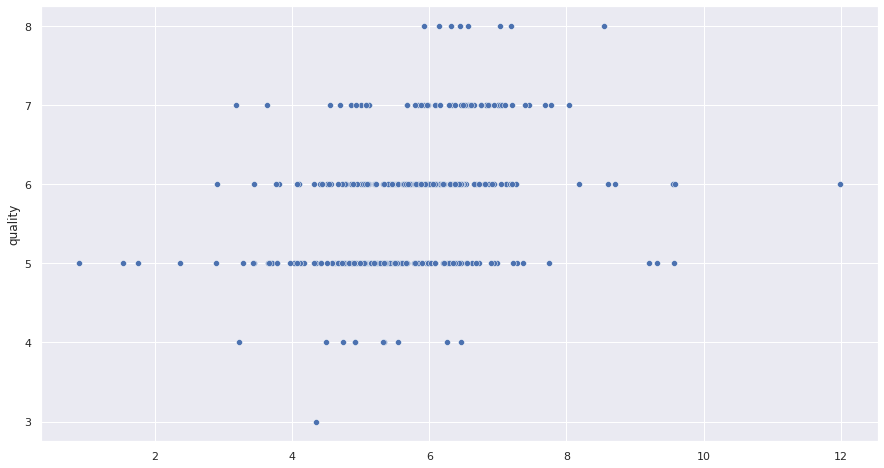

In [58]:
sns.scatterplot(y_pred,y_test)

In [59]:
from sklearn import linear_model
regr = linear_model.LinearRegression().fit(xns_train, y_train)
print(regr.coef_) 


[-0.21373021 -0.10191304  0.061161   -0.11630494 -0.05962425  0.15581864
  0.2859977 ]


In [60]:
y_pred = regr.predict(xns_test)

In [61]:
# The mean square error
np.mean((y_pred - y_test)**2)

#print(regr.score(xs_test, y_test))
print(r2_score(y_test, y_pred))

0.3457296280762321


In [62]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=1)
pls.fit(xns_train, y_train)


PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

In [63]:
y_pred = pls.predict(xns_test)

In [65]:
# The mean square error
#np.mean((y_pred - y_test)**2)

#print(regr.score(xs_test, y_test))
print(r2_score(y_test, y_pred))

0.33487071595399065
